In [ ]:
# %% Import libraries

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# %% Load the dataset

df = pd.read_csv("retail_store_inventory.csv")

In [ ]:
# %% Basic inspection

print("Shape of the dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

Shape of the dataset: (73100, 15)

Column names:
 ['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing', 'Seasonality']

Data types:
 Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

First 5 rows:
          Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-

In [ ]:
# %% Check for missing values

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [ ]:
# %% Check for duplicate rows

duplicate_rows = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_rows}")


Duplicate rows: 0


In [ ]:
# %% Preview unique values in categorical fields

print("\nUnique values in 'Weather Condition':", df['Weather Condition'].unique())
print("Unique values in 'Seasonality':", df['Seasonality'].unique())


Unique values in 'Weather Condition': ['Rainy' 'Sunny' 'Cloudy' 'Snowy']
Unique values in 'Seasonality': ['Autumn' 'Summer' 'Winter' 'Spring']


In [ ]:
# %% Show only columns with missing values

missing = df.isnull().sum()
missing = missing[missing > 0]
print("\nColumns with missing values:")
print(missing)


Columns with missing values:
Series([], dtype: int64)


In [ ]:
# %% Count rows with any missing values

rows_with_na = df.isnull().any(axis=1).sum()
print(f"\nRows with at least one missing value: {rows_with_na}")


Rows with at least one missing value: 0


In [ ]:
# %% Drop rows with any missing values

df_cleaned = df.dropna()
print("\nNew dataset shape after dropping missing rows:", df_cleaned.shape)


New dataset shape after dropping missing rows: (73100, 15)


In [ ]:
# %% Convert 'Date' column to datetime format

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%Y-%m-%d', errors='coerce')
print("\nDate column type after conversion:", df_cleaned['Date'].dtype)
print("Date range:", df_cleaned['Date'].min(), "to", df_cleaned['Date'].max())


Date column type after conversion: datetime64[ns]
Date range: 2022-01-01 00:00:00 to 2024-01-01 00:00:00


In [ ]:
# %% Extract month from the date

df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')

In [ ]:
# %% Group by Month and include row count to detect incomplete months

monthly_summary = df_cleaned.groupby('Month').agg({
    'Units Sold': 'sum',
    'Demand Forecast': 'sum',
    'Inventory Level': 'mean',
    'Date': 'count'
}).rename(columns={'Date': 'Row Count'}).reset_index()

In [ ]:
# %% Filter out months with low data or zero values

monthly_summary = monthly_summary[(monthly_summary['Row Count'] > 100) &
                                  (monthly_summary['Units Sold'] > 0) &
                                  (monthly_summary['Demand Forecast'] > 0)]

monthly_summary['Month'] = monthly_summary['Month'].astype(str)

In [ ]:
# %% Calculate Forecast Accuracy (MAE and MAPE)

# Calculate MAE
monthly_summary['MAE'] = abs(monthly_summary['Units Sold'] - monthly_summary['Demand Forecast'])

# Calculate MAPE (avoid divide by zero)
monthly_summary['MAPE'] = (monthly_summary['MAE'] / monthly_summary['Units Sold']) * 100

# Print summary metrics
print("Forecast Accuracy:")
print(monthly_summary[['Month', 'MAE', 'MAPE']])

Forecast Accuracy:
      Month       MAE      MAPE
0   2022-01  15651.72  3.727150
1   2022-02  14434.42  3.691177
2   2022-03  15992.41  3.753444
3   2022-04  15065.83  3.698225
4   2022-05  14933.32  3.600134
5   2022-06  14980.22  3.605270
6   2022-07  15530.64  3.640324
7   2022-08  15443.69  3.634528
8   2022-09  15460.14  3.756017
9   2022-10  15282.19  3.580116
10  2022-11  14960.95  3.609092
11  2022-12  15666.24  3.799525
12  2023-01  15437.24  3.645949
13  2023-02  15013.47  3.897902
14  2023-03  15522.77  3.726759
15  2023-04  14260.59  3.555574
16  2023-05  14765.68  3.526781
17  2023-06  15446.56  3.807939
18  2023-07  16592.60  3.788966
19  2023-08  16228.17  3.896310
20  2023-09  14511.74  3.579955
21  2023-10  15360.74  3.608806
22  2023-11  15843.43  3.807364
23  2023-12  14818.78  3.539472


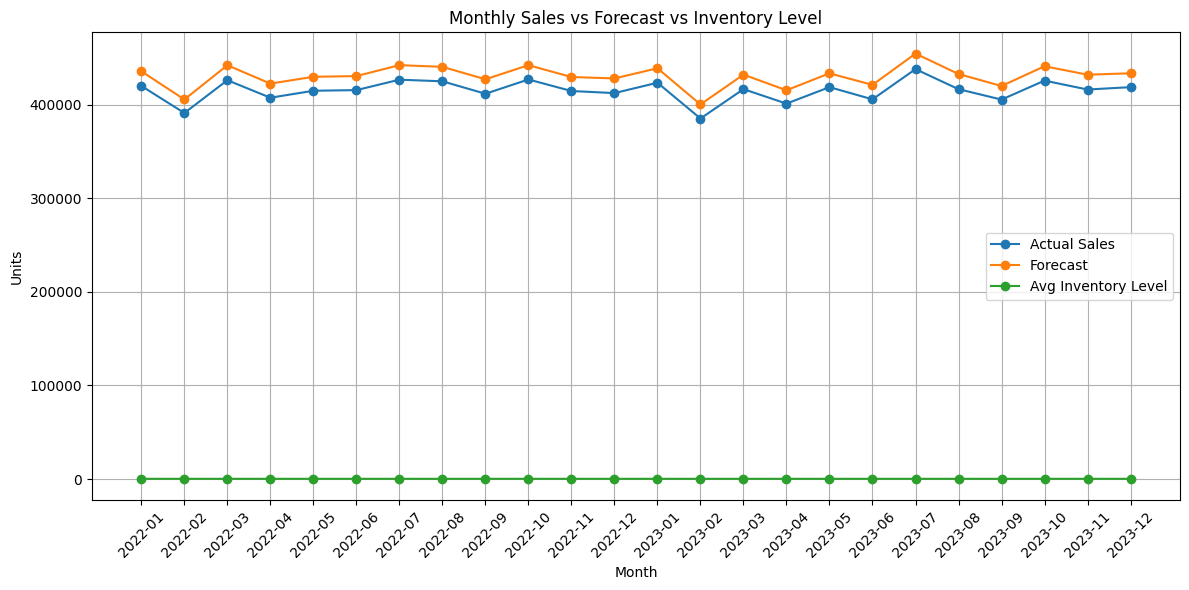

In [ ]:
# %% Plot the results

plt.figure(figsize=(12, 6))
plt.plot(monthly_summary['Month'], monthly_summary['Units Sold'], marker='o', label='Actual Sales')
plt.plot(monthly_summary['Month'], monthly_summary['Demand Forecast'], marker='o', label='Forecast')
plt.plot(monthly_summary['Month'], monthly_summary['Inventory Level'], marker='o', label='Avg Inventory Level')
plt.title('Monthly Sales vs Forecast vs Inventory Level')
plt.xlabel('Month')
plt.ylabel('Units')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()